In [1]:
##install libraries

In [22]:
#pip install tensorflow


In [23]:
#pip install markdown

In [24]:
#pip install scipy

In [25]:
#pip install matplotlib

In [26]:
#pip install opencv-python

##Understanding the image/data


In [46]:
import cv2

# Load the Orange
image = cv2.imread('dataset/train/banana/Banana_0.jpg')

# Get the shape of the image
height, width, channels = image.shape

print("Image Shape - Height: {}, Width: {}, Channels: {}".format(height, width, channels))


Image Shape - Height: 100, Width: 100, Channels: 3


##import libraries

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import keras

##load data

In [48]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    'dataset/train/',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)
validation_data = test_datagen.flow_from_directory(
    'dataset/validation/',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)




Found 806 images belonging to 2 classes.
Found 172 images belonging to 2 classes.


In [29]:
type(train_data)

keras.src.legacy.preprocessing.image.DirectoryIterator

In [11]:
#Base line Model

#Base line Model

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.5334 - loss: 0.8535 - val_accuracy: 0.9884 - val_loss: 0.4347
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9743 - loss: 0.1505 - val_accuracy: 1.0000 - val_loss: 5.4231e-04
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 3.0458e-04
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 1.0000 - loss: 6.2244e-04 - val_accuracy: 1.0000 - val_loss: 2.3843e-05
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 1.0000 - loss: 1.2765e-04 - val_accuracy: 1.0000 - val_loss: 1.0094e-05
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 1.0000 - loss: 5.9245e-05 - val_accuracy: 1.0000 - val_loss: 6.5177e-06
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 1.0000 - loss: 1.7557e-04 - val_accuracy: 1.0000 - val_loss: 4.7125e-06
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 1.0000 

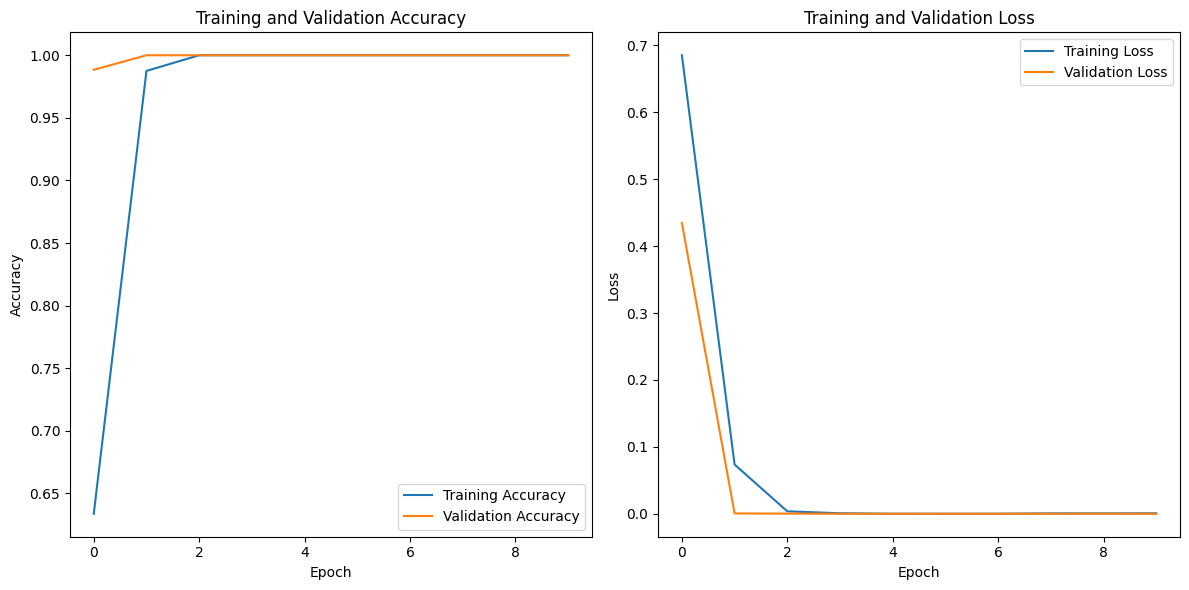

In [45]:
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Add dropout
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Add dropout
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Add dropout
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data  # Change test_data to validation_data
)

# Plotting the training and validation curves
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

#savemodel
#model.save('model1.h5')
keras.saving.save_model(model, 'model1.keras')


In [13]:
#Refined Model 1 - with early stopping callback

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.7874 - loss: 0.4112 - val_accuracy: 1.0000 - val_loss: 3.6169e-06
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 1.0000 - loss: 5.2637e-05 - val_accuracy: 1.0000 - val_loss: 5.7843e-07
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 1.0000 - loss: 1.7446e-05 - val_accuracy: 1.0000 - val_loss: 9.6220e-07
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 1.0000 - loss: 5.0671e-06 - val_accuracy: 1.0000 - val_loss: 2.1207e-06
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 1.0000 - loss: 8.8081e-06 - val_accuracy: 1.0000 - val_loss: 4.1988e-07
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 1.0000 - loss: 9.2294e-07 - val_accuracy: 1.0000 - val_loss: 3.8301e-07
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 1.0000 - loss: 6.3557e-05 - val_accuracy: 1.0000 - val_loss: 2.9016e-05
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accura

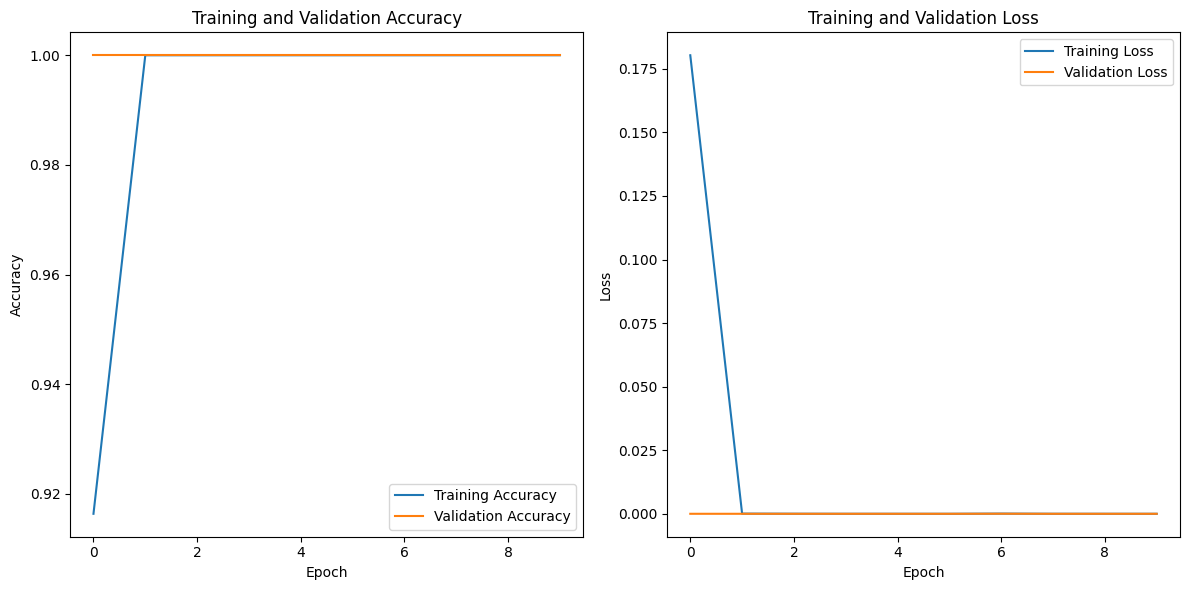

In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Add dropout
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Add dropout
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),  # Add dropout
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=10,
    validation_data=validation_data,  # Change test_data to validation_data
    callbacks=[early_stopping]  # Add EarlyStopping callback
)

# Plotting the training and validation curves
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

#savemodel
#model.save('model2.h5')
keras.saving.save_model(model, 'model2.keras')


#Refined Model -Early stopping auto adjusting epoch number

Found 800 images belonging to 2 classes.
Found 172 images belonging to 2 classes.
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.6481 - loss: 0.7729 - val_accuracy: 1.0000 - val_loss: 0.0921
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9669 - loss: 0.0802 - val_accuracy: 1.0000 - val_loss: 0.0279
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.9979 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9988 - loss: 0.0054 - val_accuracy: 1.0000 - val_loss: 9.7814e-04


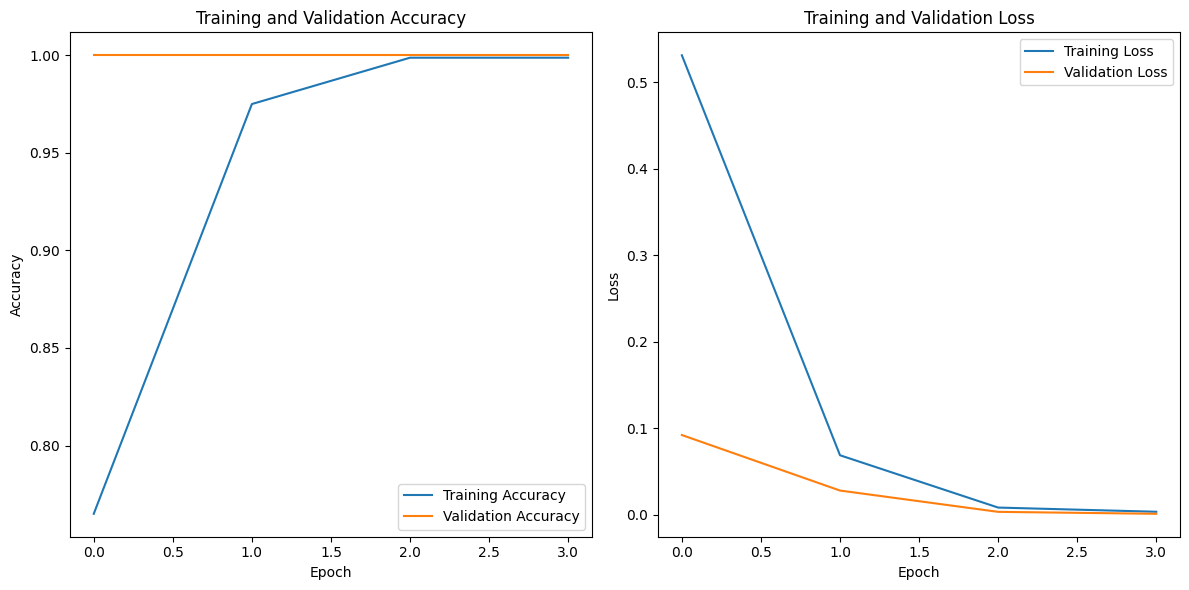

In [40]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    'dataset/train/',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'  # Should be 'binary' for two classes
)
validation_data = test_datagen.flow_from_directory(
    'dataset/validation/',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'  # Should be 'binary' for two classes
)

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=[early_stopping]  # Add Early Stopping callback
)

# Plotting the training and validation curves
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
#model.save('model1.h5')


In [ ]:
#Refined 4

Found 806 images belonging to 2 classes.
Found 172 images belonging to 2 classes.
Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.7011 - loss: 0.7154 - val_accuracy: 1.0000 - val_loss: 0.0141
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9947 - loss: 0.0139 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 1.0000 - val_loss: 4.9816e-04
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 1.0000 - loss: 3.2710e-04 - val_accuracy: 1.0000 - val_loss: 2.9573e-04


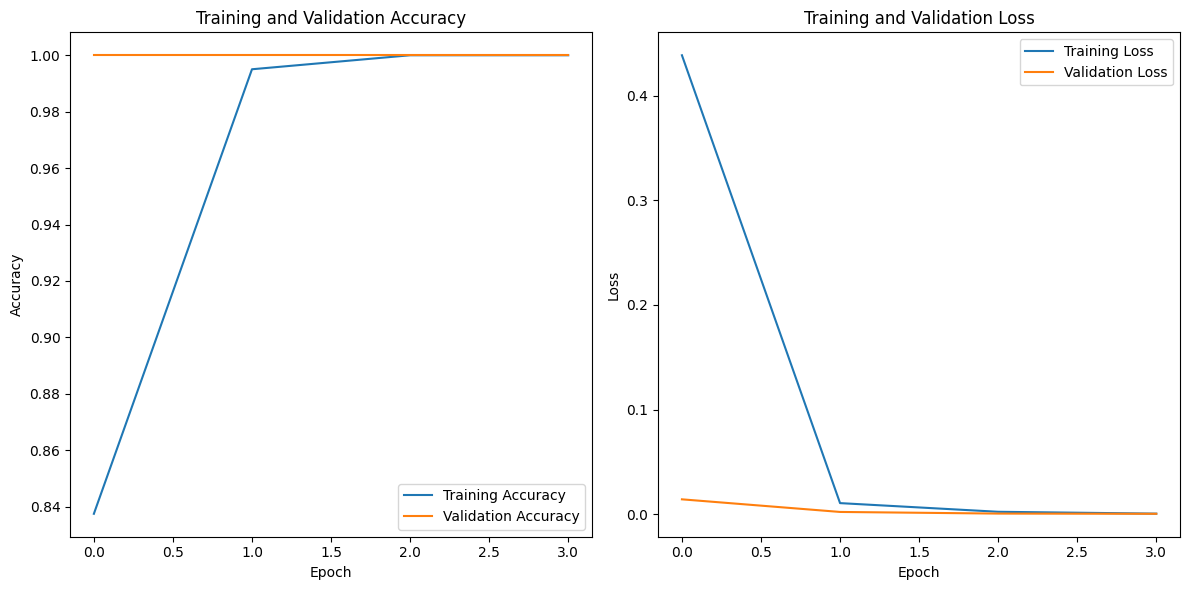

In [49]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    'dataset/train/',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'  # Should be 'binary' for two classes
)
validation_data = test_datagen.flow_from_directory(
    'dataset/validation/',
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'  # Should be 'binary' for two classes
)

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=[early_stopping]  # Add Early Stopping callback
)

# Plotting the training and validation curves
plt.figure(figsize=(12, 6))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
#model.save('model1.h5')

keras.saving.save_model(model, 'model4.keras')


##Prediction with Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


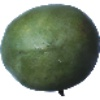

Prediction result: [[0.99168915]]

Predicted: banana

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


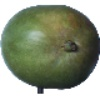

Prediction result: [[0.9924332]]

Predicted: banana

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


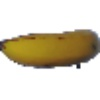

Prediction result: [[0.00051087]]

Predicted: banana

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


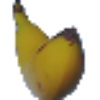

Prediction result: [[0.03004245]]

Predicted: banana

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


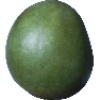

Prediction result: [[0.9916419]]

Predicted: banana

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


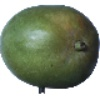

Prediction result: [[0.9911377]]

Predicted: banana

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


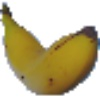

Prediction result: [[0.01254487]]

Predicted: banana

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


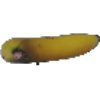

Prediction result: [[0.00075404]]

Predicted: banana



In [50]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from IPython.display import display
from PIL import Image

# Define the path to the test folder
test_folder = 'dataset/test'  # Assuming 'test' folder is in the same directory as this script

# Get the list of image files in the test folder
image_files = [os.path.join(test_folder, img) for img in os.listdir(test_folder) if img.endswith('.jpg')]

# Load the trained model
model = load_model('model4.keras')

# Define the class labels
class_labels = {0: 'banana', 1: 'mango'}

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Predict on each image and display the image, filename, and prediction
for img_file in image_files:
    img = preprocess_image(img_file)
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    
    filename = os.path.basename(img_file)
    
    # Load the image using PIL
    img_pil = Image.open(img_file)
    
    # Display the image, filename, and prediction on separate lines
    display(img_pil)
   # print(f'File: {filename}')
    print(f'Prediction result: {prediction}\n')
    print(f'Predicted: {predicted_label}\n')


In [36]:
 ##Predict with text

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Define the path to the test folder
test_folder = 'dataset/test'  # Assuming 'test' folder is in the same directory as this script

# Get the list of image files in the test folder
image_files = [os.path.join(test_folder, img) for img in os.listdir(test_folder) if img.endswith('.jpg')]

# Load the trained model
model = load_model('model4.keras')

# Define the class labels
class_labels = {0: 'banana', 1: 'mango'}

# Function to preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img

# Predict on each image and display the predicted label and filename
for img_file in image_files:
    img = preprocess_image(img_file)
    prediction = model.predict(img)
    print (prediction)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]
    
    filename = os.path.basename(img_file)
    
    # Print the predicted label and filename on a new line
    print(f'File: {filename}\nPredicted: {predicted_label}\n')
